# Setup and Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Loading the dataset
The original CSV had an header error where a comma was missing between Discount and DLC count, which shifted the columns and values. Manually added the comma and saved it as games_fixed.csv. Loaded the dataset and used head() to see if everything lined up correctly. Will also move the target variable "Estimated owners" to the last column.

In [2]:
gamesData = pd.read_csv('data/raw/games_fixed.csv')

gamesData.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
# Move target variable to the end

target = 'Estimated owners'
cols = [c for c in gamesData.columns if c != target] + [target]
gamesData = gamesData[cols]

gamesData.head()

,AppID,Name,Release date,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Estimated owners
0,20200,Galactic Bowling,"Oct 21, 2008",0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0 - 20000
1,655370,Train Bandit,"Oct 12, 2017",0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0 - 20000
2,1732930,Jolt Project,"Nov 17, 2021",0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0 - 20000
3,1355720,Henosis™,"Jul 23, 2020",0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0 - 20000
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0 - 20000


# Removing irrelevant or "cheat" features
Removed features that were blatantly irrelevant, like Movies, Website, Screenshots. Also removed features that would allow the machine to "cheat". Goal of this project is to predict the popularity of a game before it's launched or people have played it. Features like Peak Concurrent Users is a direct implication of a game's popularity and measured after launch. These types of features will be removed.

In [4]:
# Show all features in the dataset

print(gamesData.columns)

Index(['AppID', 'Name', 'Release date', 'Peak CCU', 'Required age', 'Price',
       'Discount', 'DLC count', 'About the game', 'Supported languages',
       'Full audio languages', 'Reviews', 'Header image', 'Website',
       'Support url', 'Support email', 'Windows', 'Mac', 'Linux',
       'Metacritic score', 'Metacritic url', 'User score', 'Positive',
       'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies',
       'Estimated owners'],
      dtype='object')


In [5]:
# Removing irrelevant or "cheat" features

dropped_cols = [
    'AppID', 'Name', 'Peak CCU', 'Positive', 'Negative', 'Recommendations',
    'Score rank', 'User score', 'Metacritic score', 'Metacritic url',
    'Header image', 'Website', 'Support url', 'Support email',
    'Reviews', 'Notes', 'Screenshots', 'Movies',
    'Average playtime forever', 'Median playtime forever',
    'Average playtime two weeks', 'Median playtime two weeks'
]

gamesData = gamesData.drop(columns=dropped_cols)

# Show remaining features in the dataset
print(gamesData.columns)

Index(['Release date', 'Required age', 'Price', 'Discount', 'DLC count',
       'About the game', 'Supported languages', 'Full audio languages',
       'Windows', 'Mac', 'Linux', 'Achievements', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Tags', 'Estimated owners'],
      dtype='object')


# Target Variable Analysis
Now analyzing the target variable 'Estimated owners' and seeing what we can do with it.

In [6]:
# Checking the values of the target variable
gamesData['Estimated owners'].value_counts().sort_index()

Estimated owners
0 - 0                    22091
0 - 20000                70206
100000 - 200000           2664
1000000 - 2000000          525
10000000 - 20000000         38
100000000 - 200000000        1
20000 - 50000             8277
200000 - 500000           2206
2000000 - 5000000          336
20000000 - 50000000         21
50000 - 100000            4068
500000 - 1000000           921
5000000 - 10000000          93
50000000 - 100000000         5
Name: count, dtype: int64

There's a range of 0 - 0, which can include games that didn't released, were removed, etc. These will be removed as they are noisy data. A new column 'popularity_class' will be added and be the new target variable. It's binning value ranges above of 'Estimated owners' into three categories: 
- Low 
- Medium
- High  

Estimated owners will be removed

In [7]:
# 1. Drop rows with "0 - 0" range
gamesData = gamesData[gamesData['Estimated owners'] != '0 - 0'].copy()

# 2. Define the classification function
def categorize_popularity(owners_range):
    if pd.isna(owners_range):
        return None
    owners_range = owners_range.replace(',', '')
    low, high = map(int, owners_range.split(' - '))
    
    if high <= 50000:
        return 'Low'
    elif high <= 500000:
        return 'Medium'
    else:
        return 'High'

# 3. Apply classification
gamesData['popularity_class'] = gamesData['Estimated owners'].apply(categorize_popularity)

# 4. Check the resulting class distribution
gamesData['popularity_class'].value_counts()


popularity_class
Low       78483
Medium     8938
High       1940
Name: count, dtype: int64

In [8]:
# remove the original 'Estimated owners' column

gamesData = gamesData.drop(columns=['Estimated owners'])
gamesData.head()

,Release date,Required age,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Achievements,Developers,Publishers,Categories,Genres,Tags,popularity_class
0,"Oct 21, 2008",0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],True,False,False,30,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",Low
1,"Oct 12, 2017",0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,False,12,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",Low
2,"Nov 17, 2021",0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],True,False,False,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,Low
3,"Jul 23, 2020",0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,True,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",Low
4,"Feb 3, 2020",0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],True,True,False,17,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",Low


# Data Insights& Visualizations

Checking the structure after initial changes were made. We'll analyze the features that stayed as potential predictors. We'll look at 
- feature distributions
- relationships
- potential problems, like missing data, skews, outliers

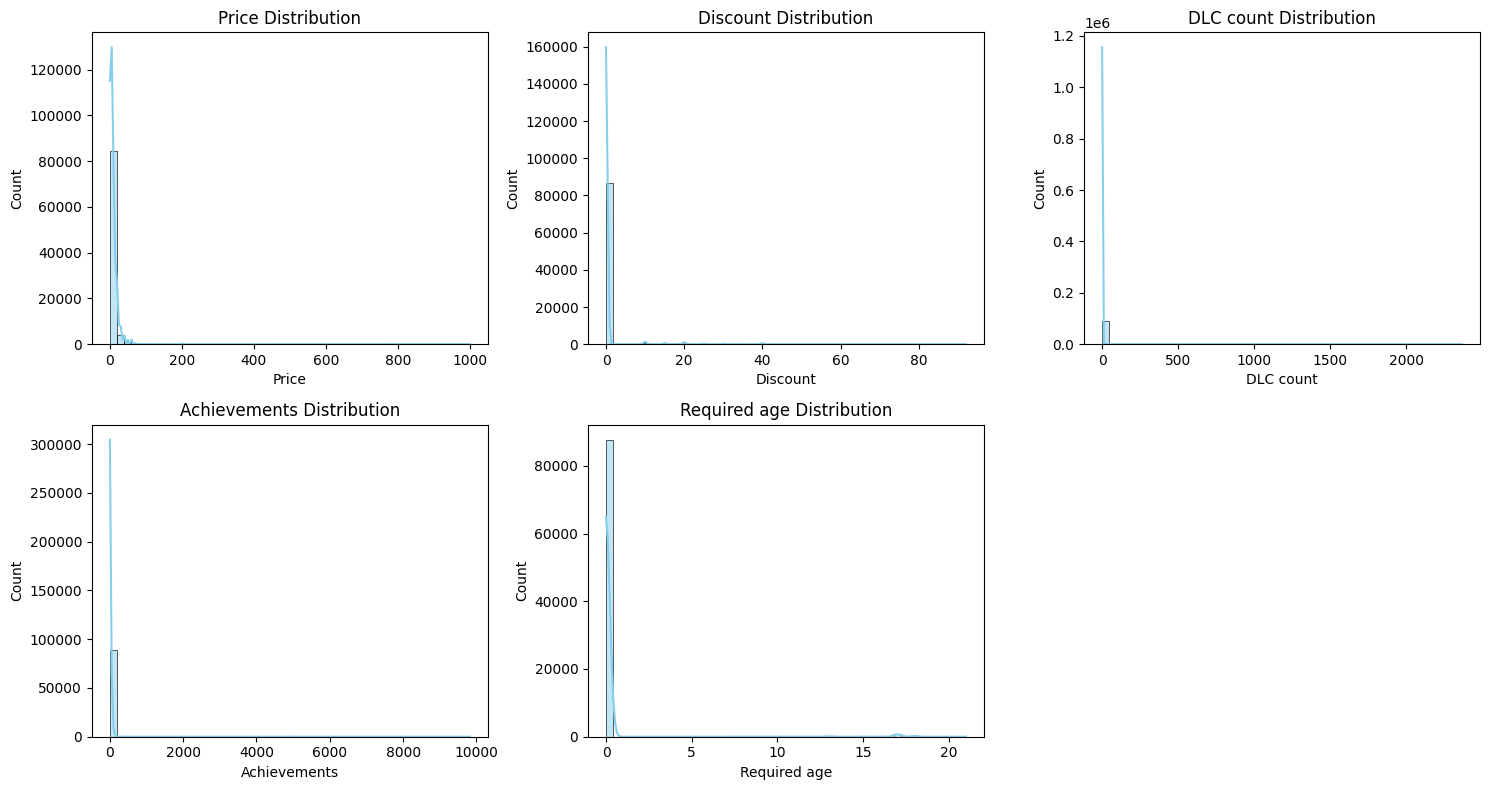

In [9]:
# Select numeric columns to visualize
numeric_features = ['Price', 'Discount', 'DLC count', 'Achievements', 'Required age']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(gamesData[col], bins=50, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

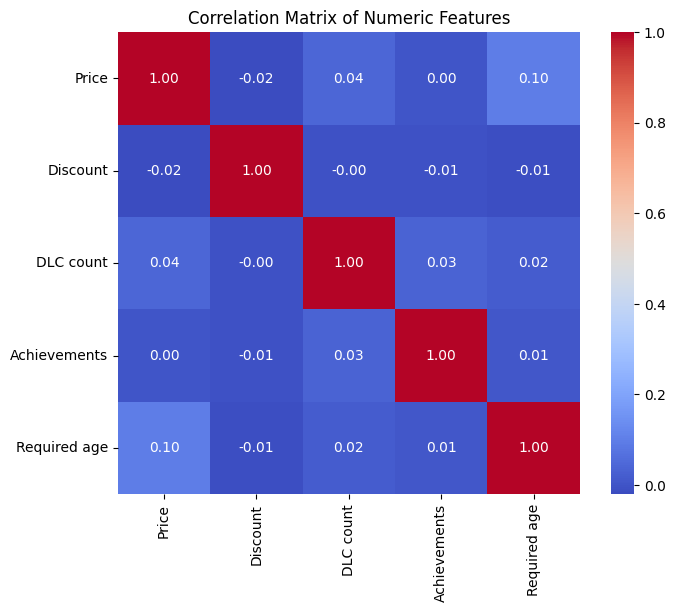

In [10]:
# Compute correlation matrix for numeric columns
corr_matrix = gamesData[['Price', 'Discount', 'DLC count', 'Achievements', 'Required age']].corr()

# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


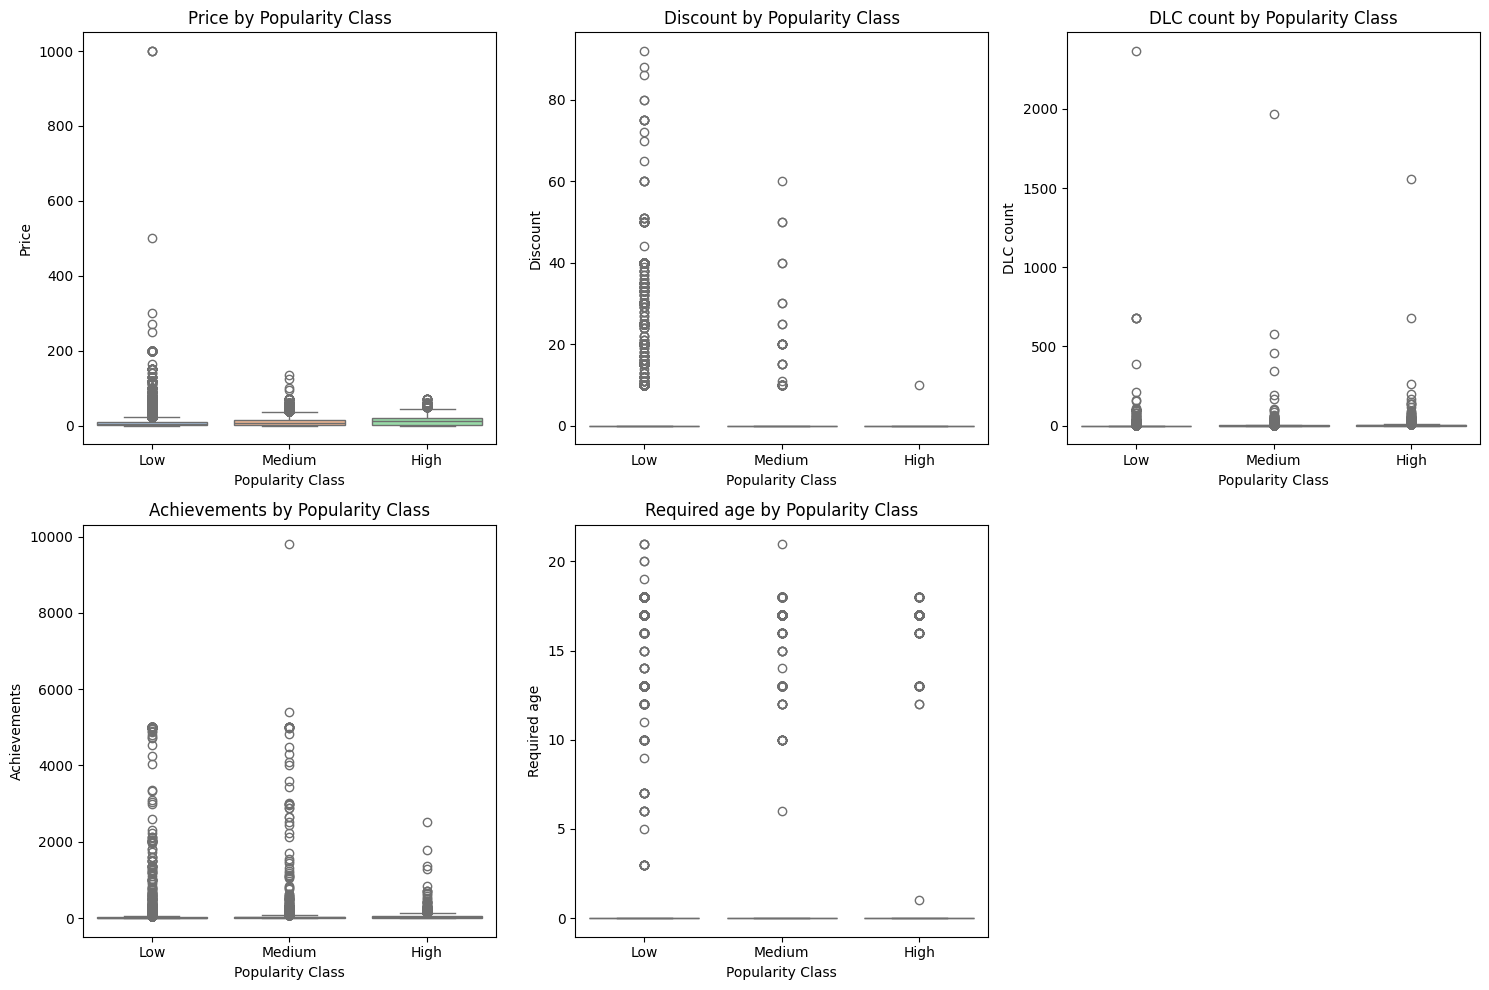

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric columns
numeric_features = ['Price', 'Discount', 'DLC count', 'Achievements', 'Required age']

# Plot boxplots for each numeric column grouped by popularity_class
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        data=gamesData,
        x='popularity_class',
        y=col,
        hue='popularity_class',  # Assign hue to avoid warning
        palette='pastel',
        dodge=False,             # Prevent separate boxes for hue
        legend=False             # Remove legend since it's redundant
    )
    plt.title(f'{col} by Popularity Class')
    plt.xlabel('Popularity Class')
    plt.ylabel(col)
plt.tight_layout()
plt.show()



# Handling Missing Values
Now we'll start handling with missing values

In [12]:
# Check missing values (both count and percentage)
missing_counts = gamesData.isna().sum()
missing_percent = (missing_counts / len(gamesData)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percent Missing': missing_percent.round(2)
}).sort_values(by='Missing Values', ascending=False)

missing_summary


,Missing Values,Percent Missing
Tags,15332,17.16
Categories,1161,1.30
Publishers,344,0.38
About the game,106,0.12
Genres,77,0.09
Developers,5,0.01
Required age,0,0.00
Release date,0,0.00
Discount,0,0.00
Price,0,0.00


In [13]:
text_columns = ['Tags', 'Categories', 'Publishers', 'About the game', 'Genres', 'Developers']

for col in text_columns:
    gamesData[col] = gamesData[col].fillna('Unknown')

# Verify no missing values remain
gamesData.isna().sum()

Release date            0
Required age            0
Price                   0
Discount                0
DLC count               0
About the game          0
Supported languages     0
Full audio languages    0
Windows                 0
Mac                     0
Linux                   0
Achievements            0
Developers              0
Publishers              0
Categories              0
Genres                  0
Tags                    0
popularity_class        0
dtype: int64

In [14]:
# Features to cap
numeric_outliers = ['Price', 'DLC count', 'Achievements']

for col in numeric_outliers:
    upper_limit = gamesData[col].quantile(0.99)
    gamesData[col] = gamesData[col].clip(upper=upper_limit)

# Verify new max values
gamesData[numeric_outliers].max()


Price            49.99
DLC count         6.00
Achievements    100.00
dtype: float64

In [15]:
skewed_features = ['Price', 'DLC count', 'Achievements']

for col in skewed_features:
    gamesData[col] = np.log1p(gamesData[col])

# Verify transformation by checking basic statistics
gamesData[skewed_features].describe()


,Price,DLC count,Achievements
count,89361.000000,89361.000000,89361.000000
mean,1.766839,0.133087,1.552705
std,0.942340,0.363625,1.587054
min,0.000000,0.000000,0.000000
25%,1.095273,0.000000,0.000000
50%,1.790091,0.000000,1.609438
75%,2.396986,0.000000,3.044522
max,3.931630,1.945910,4.615121


In [16]:
gamesData.head()

,Release date,Required age,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Achievements,Developers,Publishers,Categories,Genres,Tags,popularity_class
0,"Oct 21, 2008",0,3.044046,0,0.0,Galactic Bowling is an exaggerated and stylize...,['English'],[],True,False,False,3.433987,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",Low
1,"Oct 12, 2017",0,0.688135,0,0.0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,False,2.564949,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",Low
2,"Nov 17, 2021",0,1.790091,0,0.0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],True,False,False,0.000000,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",Unknown,Low
3,"Jul 23, 2020",0,1.944481,0,0.0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,True,0.000000,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",Low
4,"Feb 3, 2020",0,0.000000,0,0.0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],True,True,False,2.890372,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",Low


# NLP Preprocessing

In [17]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Awsom\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Awsom\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [18]:
# Clean the 'About the game' descriptions
gamesData['About_clean'] = gamesData['About the game'].apply(clean_text)

# Check sample output
gamesData[['About the game', 'About_clean']].head()


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Awsom/nltk_data'
    - 'c:\\Users\\Awsom\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'c:\\Users\\Awsom\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'c:\\Users\\Awsom\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\Awsom\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
